In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# dropping insignificant features
dataset = dataset.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [4]:
for i in dataset.columns:
    print("*************",i,"************")
    print()
    print(set(dataset[i].tolist()))
    print()

************* Survived ************

{0, 1}

************* Pclass ************

{1, 2, 3}

************* Sex ************

{'male', 'female'}

************* Age ************

{nan, nan, 2.0, nan, 4.0, nan, nan, nan, 8.0, nan, nan, nan, nan, nan, 14.0, 15.0, 3.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 16.0, 24.0, 23.0, 5.0, 26.0, 28.5, 27.0, 28.0, 29.0, nan, 31.0, nan, nan, 34.0, 35.0, nan, 7.0, 38.0, 39.0, 40.0, 42.0, 37.0, 45.0, 46.0, 47.0, 9.0, 49.0, 44.0, 51.0, 50.0, 45.5, 54.0, 55.0, 11.0, 55.5, 58.0, 59.0, 56.0, 12.0, 61.0, 62.0, 63.0, 65.0, 66.0, 60.0, 64.0, 13.0, 70.5, 71.0, 14.5, 70.0, 74.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 80.0, nan, nan, 6.0, nan, nan, 20.5, nan, nan, nan, nan, nan, nan, nan, 23.5, nan, nan, nan, 24.5, nan, nan, nan, nan, 25.0, nan, nan, nan, nan, nan, 0.42, nan, nan, nan, 30.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 32.0, 32.5, nan, nan, 33.0, 34.5, nan, nan, nan, nan, 36.5, 36.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [5]:
# Preprocessing

In [6]:
# Handling Null Values

dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [7]:
dataset.isnull().sum()/len(dataset)*100  # if more than 25 % delete the feature

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Embarked     0.224467
dtype: float64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


<AxesSubplot:ylabel='Age'>

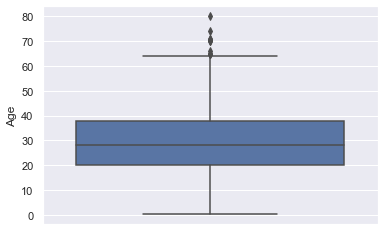

In [9]:
sns.boxplot(y='Age', data=dataset)

In [10]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].median())

In [11]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
dataset['Embarked']=dataset['Embarked'].fillna('S')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [14]:
# Encoding dataset
# Label encoding
dataset['Sex']=dataset['Sex'].astype('category')
dataset['Sex']=dataset['Sex'].cat.codes

dataset['Embarked']=dataset['Embarked'].astype('category')
dataset['Embarked']=dataset['Embarked'].cat.codes

In [15]:
dataset = pd.get_dummies(dataset, columns=['Embarked'])

In [16]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1


In [17]:
dataset = dataset.drop(['Embarked_0'],axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,0,1
1,1,1,0,38.0,1,0,0,0
2,1,3,0,26.0,0,0,0,1
3,1,1,0,35.0,1,0,0,1
4,0,3,1,35.0,0,0,0,1


In [18]:
# Handling Outliers
# Outliers not required in logistic regresison
dataset['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
# Here we have Age from 0 to 80 as valid (No need of outliers)

In [20]:
# Feature scaling Technique
x = dataset.drop(['Survived'],axis=1)
y = dataset['Survived']

In [21]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2
0,3,1,22.0,1,0,0,1
1,1,0,38.0,1,0,0,0
2,3,0,26.0,0,0,0,1
3,1,0,35.0,1,0,0,1
4,3,1,35.0,0,0,0,1


In [22]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler
# x_sc = StandardScaler()
x_sc = MinMaxScaler((-1,1))
# x_sc = x_sc.fit_transform(x)
x_sc= pd.DataFrame(x_sc.fit_transform(x))

In [24]:
x_sc.columns = x.columns

In [25]:
# Check imbalance dataset
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [26]:
# The data is well balanced

In [27]:
#  Preprocessing Completed

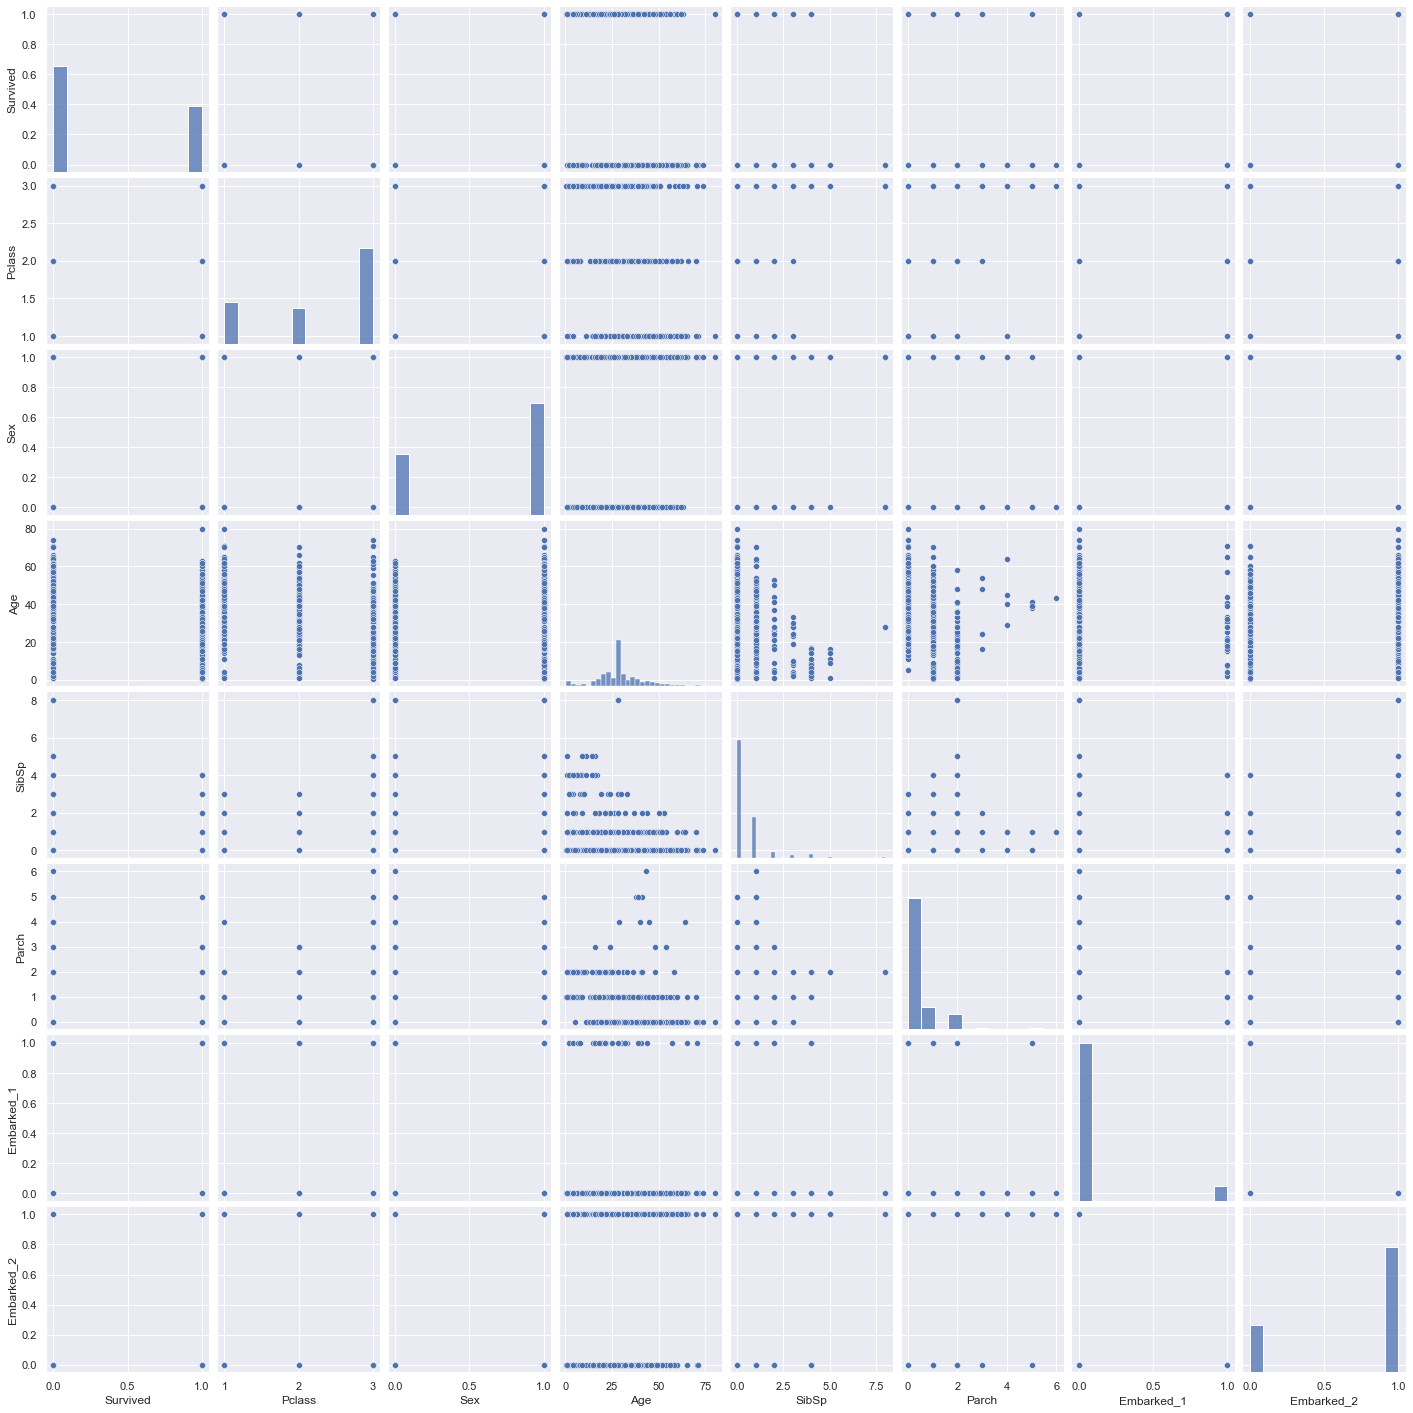

In [28]:
# EDA - Exploratory data analysis

sns.pairplot(dataset)

<AxesSubplot:xlabel='Survived', ylabel='Density'>

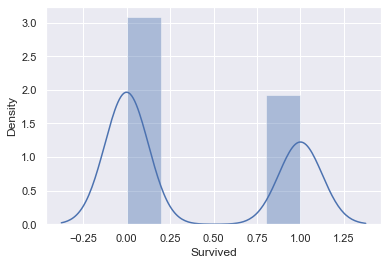

In [29]:
sns.distplot(dataset['Survived'])

In [30]:
dataset.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.221009,0.074053
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.074115,0.119224
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.031415,-0.006729
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,-0.026354,0.068734
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,-0.081228,0.060814
Embarked_1,0.003650,0.221009,-0.074115,-0.031415,-0.026354,-0.081228,1.000000,-0.499421
Embarked_2,-0.149683,0.074053,0.119224,-0.006729,0.068734,0.060814,-0.499421,1.000000


<AxesSubplot:>

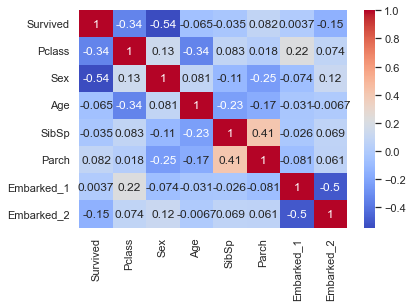

In [31]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

In [32]:
# Hence we found no multicollinearity in IDV-DV relation

In [33]:
# Test data loading

In [34]:
test = pd.read_csv('Test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
test = test.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [36]:
for i in test.columns:
    print("*******",i,"*******")
    print()
    print(set(test[i].to_list()))
    print()

******* Pclass *******

{1, 2, 3}

******* Sex *******

{'male', 'female'}

******* Age *******

{nan, nan, nan, nan, nan, nan, nan, nan, nan, 9.0, 10.0, nan, nan, 13.0, 14.0, 6.0, 2.0, 17.0, 18.0, 18.5, 20.0, 21.0, 22.0, 23.0, 24.0, 22.5, 26.0, 27.0, 28.5, 25.0, 28.0, 30.0, 31.0, 32.0, 33.0, 34.5, 35.0, 36.0, 29.0, 32.5, 39.0, 41.0, 42.0, 43.0, 40.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 44.0, 51.0, 53.0, 54.0, 55.0, 11.5, 57.0, 58.0, 59.0, 60.0, 12.0, 62.0, 63.0, 61.0, 60.5, 64.0, 67.0, 14.5, nan, 76.0, 15.0, nan, nan, nan, 16.0, nan, nan, nan, 3.0, 19.0, 26.5, 5.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 34.0, 7.0, 36.5, 37.0, nan, nan, 38.0, nan, nan, nan, nan, nan, nan, nan, 0.17, 38.5, 40.5, 8.0, 0.92, 0.83, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.75, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.33, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}

*****

In [37]:
# handling null values
test.isnull().sum()/len(test)*100

Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Embarked     0.000000
dtype: float64

<AxesSubplot:ylabel='Age'>

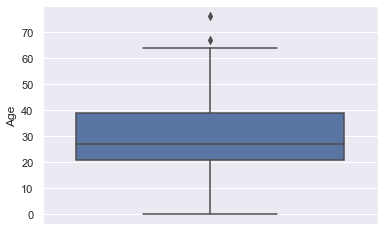

In [38]:
sns.boxplot(y='Age', data=test)

In [39]:
# If ouliers present,, go with median
test['Age']=test['Age'].fillna(test['Age'].median())

In [40]:
test.isnull().sum()/len(test)*100

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Embarked    0.0
dtype: float64

In [41]:
# Encoding dataset
# Label encoding
test['Sex']=test['Sex'].astype('category')
test['Sex']=test['Sex'].cat.codes

test['Embarked']=test['Embarked'].astype('category')
test['Embarked']=test['Embarked'].cat.codes

In [42]:
test = pd.get_dummies(test, columns=['Embarked'])

In [43]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,0,0,0,1,0
1,3,0,47.0,1,0,0,0,1
2,2,1,62.0,0,0,0,1,0
3,3,1,27.0,0,0,0,0,1
4,3,0,22.0,1,1,0,0,1


In [44]:
test = test.drop(['Embarked_0'],axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2
0,3,1,34.5,0,0,1,0
1,3,0,47.0,1,0,0,1
2,2,1,62.0,0,0,1,0
3,3,1,27.0,0,0,0,1
4,3,0,22.0,1,1,0,1


In [45]:
# Handling outlier - Not required for classification
test['Age'].describe()  

count    418.000000
mean      29.599282
std       12.703770
min        0.170000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [46]:
# The age is valid with min & max

In [47]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2
0,3,1,34.5,0,0,1,0
1,3,0,47.0,1,0,0,1
2,2,1,62.0,0,0,1,0
3,3,1,27.0,0,0,0,1
4,3,0,22.0,1,1,0,1


In [48]:
# Splitting dataset into Train & Test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.75, random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 7)
(223, 7)
(668,)
(223,)


In [49]:
# Building Decision Tree Multiclass Classification model

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred_dtree_train=dtree.predict(x_train)
y_pred_dtree_test=dtree.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [53]:
print(confusion_matrix(y_train, y_pred_dtree_train))

print("#############"*10)

print(confusion_matrix(y_test, y_pred_dtree_test))

[[396   3]
 [ 37 232]]
##################################################################################################################################
[[125  25]
 [ 25  48]]


In [54]:
print(classification_report(y_train, y_pred_dtree_train))

print("#############"*10)

print(classification_report(y_test, y_pred_dtree_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       399
           1       0.99      0.86      0.92       269

    accuracy                           0.94       668
   macro avg       0.95      0.93      0.94       668
weighted avg       0.94      0.94      0.94       668

##################################################################################################################################
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.66      0.66      0.66        73

    accuracy                           0.78       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.78      0.78      0.78       223



In [55]:
print(accuracy_score(y_train, y_pred_dtree_train))

print("#############"*10)

print(accuracy_score(y_test, y_pred_dtree_test))

0.9401197604790419
##################################################################################################################################
0.7757847533632287


In [56]:
# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [58]:
y_pred_train=logit.predict(x_train)
y_pred_test=logit.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [60]:
print(confusion_matrix(y_train, y_pred_train))

print("#############"*10)

print(confusion_matrix(y_test, y_pred_test))

[[337  62]
 [ 77 192]]
##################################################################################################################################
[[131  19]
 [ 22  51]]


In [61]:
print(classification_report(y_train, y_pred_train))

print("#############"*10)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       399
           1       0.76      0.71      0.73       269

    accuracy                           0.79       668
   macro avg       0.78      0.78      0.78       668
weighted avg       0.79      0.79      0.79       668

##################################################################################################################################
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       150
           1       0.73      0.70      0.71        73

    accuracy                           0.82       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.82      0.82       223



In [62]:
print(accuracy_score(y_train, y_pred_train))

print("#############"*10)

print(accuracy_score(y_test, y_pred_test))

0.7919161676646707
##################################################################################################################################
0.8161434977578476


In [63]:
# Final Result
final_result = logit.predict(test)
final_result

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
# append the output into test dataset
test_data=pd.concat([test,pd.DataFrame(final_result)],axis=1)
test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_1', 'Embarked_2',
       0],
      dtype='object')

In [65]:
test_data=test_data.drop(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_1', 'Embarked_2'],axis=1)
test_data.astype('bool').head()

,0
0,False
1,False
2,False
3,False
4,True


In [66]:
submission=pd.read_csv('gender_submission.csv')
submission['Survived']=test_data.astype('bool')



submission.to_csv('Final_submission_Titanic.csv', index = False)

In [67]:
# Maximum Likelihood Estimation Algorithm

In [68]:
import statsmodels.api as sm
logisticRegression = sm.Logit(y_test, x_test)
model_1 = logisticRegression.fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.486174
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  223
Model:                          Logit   Df Residuals:                      216
Method:                           MLE   Df Model:                            6
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.2311
Time:                        23:14:45   Log-Likelihood:                -108.42
converged:                       True   LL-Null:                       -141.00
Covariance Type:            nonrobust   LLR p-value:                 3.987e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.1535      0.180     -0.853      0.394      -0.506       0.199
Sex           -2.4981      0.413     -6.056      0.000      -3.307      -1.690
Age            0.0222      0.010      2.169      0.030       0.002       0.042
SibSp         -0.3316      0.221     -1.499      0.134      -0.765       0.102
Parch         -0.0326      0.246     -0.133      0.894      -0.514       0.449
Embarked_1    -0.0446      0.880     -0.051      0.960      -1.769       1.680
Embarked_2     0.7229      0.482      1.501      0.133      -0.221       1.667
==============================================================================
"""

In [69]:
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(logit, x_train, y_train, cv=15)
test_accuracy = cross_val_score(logit, x_test, y_test, cv=15)
print("train accuracy :", train_accuracy)
print("##############"*5)
print("test accuracy :", test_accuracy)

train accuracy : [0.86666667 0.84444444 0.8        0.73333333 0.8        0.82222222
 0.8        0.77777778 0.75       0.77272727 0.75       0.77272727
 0.79545455 0.72727273 0.81818182]
######################################################################
test accuracy : [0.86666667 0.93333333 0.93333333 0.73333333 0.8        0.73333333
 0.93333333 0.73333333 0.8        1.         0.66666667 0.8
 0.73333333 0.78571429 0.85714286]


In [70]:
print("train accuracy :", train_accuracy[8])
print("##############"*5)
print("test accuracy :", test_accuracy[8])

train accuracy : 0.75
######################################################################
test accuracy : 0.8
